In [37]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
df = pd.read_csv('seattle-weather.csv')

In [9]:
df

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain
...,...,...,...,...,...,...
1456,2015-12-27,8.6,4.4,1.7,2.9,rain
1457,2015-12-28,1.5,5.0,1.7,1.3,rain
1458,2015-12-29,0.0,7.2,0.6,2.6,fog
1459,2015-12-30,0.0,5.6,-1.0,3.4,sun


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           1461 non-null   object 
 1   precipitation  1461 non-null   float64
 2   temp_max       1461 non-null   float64
 3   temp_min       1461 non-null   float64
 4   wind           1461 non-null   float64
 5   weather        1461 non-null   object 
dtypes: float64(4), object(2)
memory usage: 68.6+ KB


In [17]:
if df.duplicated().sum() > 0:
    print('Duplicates are Present')
else:
    print('No Duplicates exist')

No Duplicates exist


In [19]:
df.isnull().sum()

date             0
precipitation    0
temp_max         0
temp_min         0
wind             0
weather          0
dtype: int64

In [21]:
df.describe()

,precipitation,temp_max,temp_min,wind
count,1461.000000,1461.000000,1461.000000,1461.000000
mean,3.029432,16.439083,8.234771,3.241136
std,6.680194,7.349758,5.023004,1.437825
min,0.000000,-1.600000,-7.100000,0.400000
25%,0.000000,10.600000,4.400000,2.200000
50%,0.000000,15.600000,8.300000,3.000000
75%,2.800000,22.200000,12.200000,4.000000
max,55.900000,35.600000,18.300000,9.500000


In [23]:
df.head()

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain


In [25]:
df[df['temp_min']==min(df.temp_min)]

,date,precipitation,temp_max,temp_min,wind,weather
706,2013-12-07,0.0,0.0,-7.1,3.1,sun


In [27]:
df[df['temp_max']==max(df.temp_max)]

,date,precipitation,temp_max,temp_min,wind,weather
953,2014-08-11,0.5,35.6,17.8,2.6,rain


<Axes: xlabel='temp_max', ylabel='Count'>

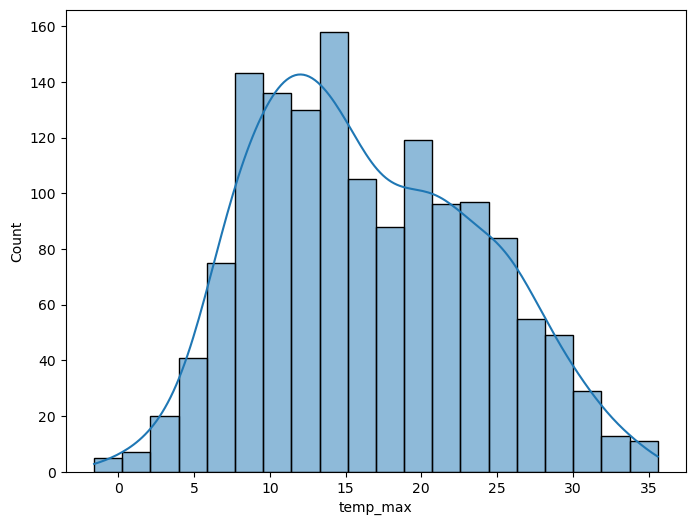

In [47]:
plt.figure(figsize=(8,6))
sns.histplot(data = df, x=df.temp_max,bins=20, kde=True)

<Axes: xlabel='temp_min', ylabel='Count'>

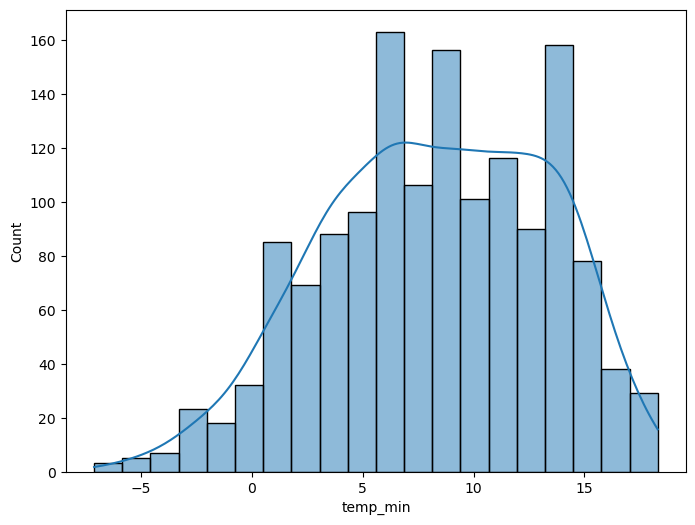

In [51]:
plt.figure(figsize=(8,6))
sns.histplot(data = df, x = df.temp_min, bins=20, kde=True)

In [53]:
df.head()

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain


In [55]:
df.loc[:,['date','temp_max']]
df['date'] = pd.to_datetime(df['date'])

## Max temperature in each month in each year

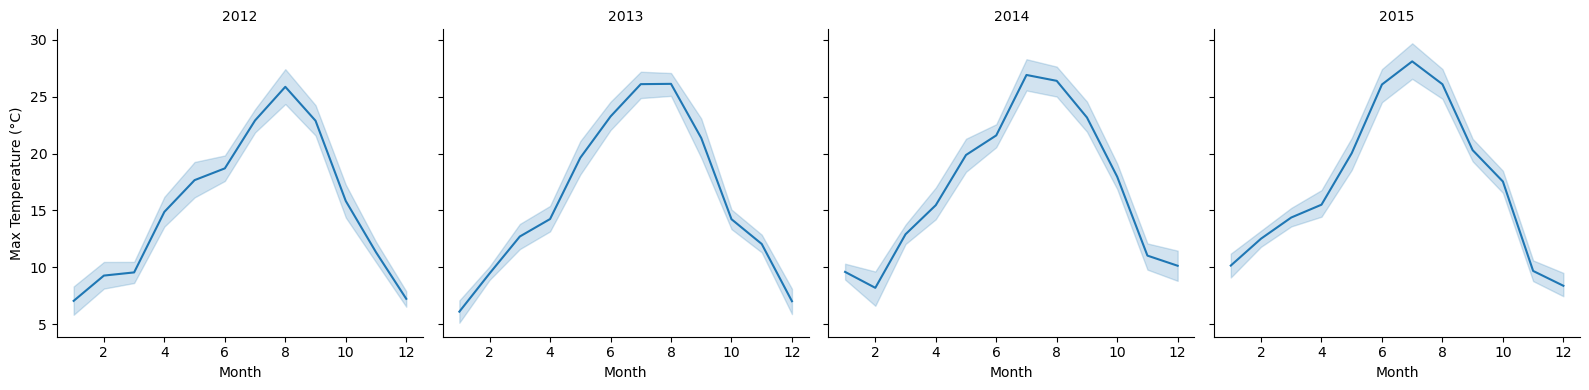

In [66]:
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
g = sns.FacetGrid(df, col='year', col_wrap=4, height=4)
g.map(sns.lineplot, 'month', 'temp_max')
g.set_axis_labels('Month', 'Max Temperature (°C)')
g.set_titles(col_template="{col_name}")
plt.show()

## Min temperature in each month in each year

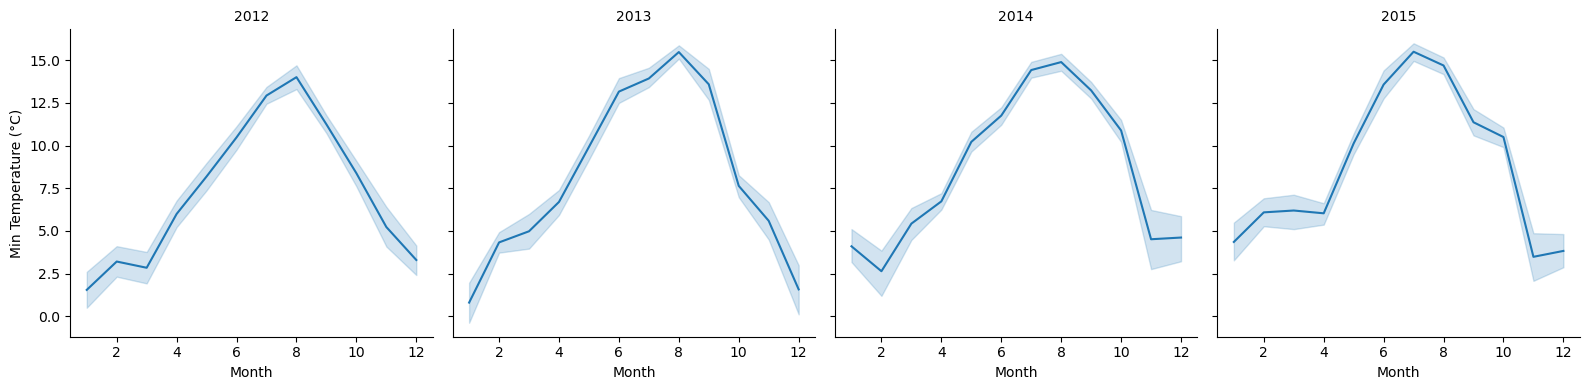

In [69]:
g = sns.FacetGrid(df, col='year', col_wrap=4, height=4)
g.map(sns.lineplot, 'month', 'temp_min')
g.set_axis_labels('Month', 'Min Temperature (°C)')
g.set_titles(col_template="{col_name}")
plt.show()

In [71]:
df.weather.value_counts()

weather
rain       641
sun        640
fog        101
drizzle     53
snow        26
Name: count, dtype: int64

C:\Users\Ashraful\AppData\Local\Temp\ipykernel_15556\4037813980.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df,x=df.weather, palette=['#FF5733', '#33FF57', '#3357FF', '#F4D03F', '#8E44AD'])


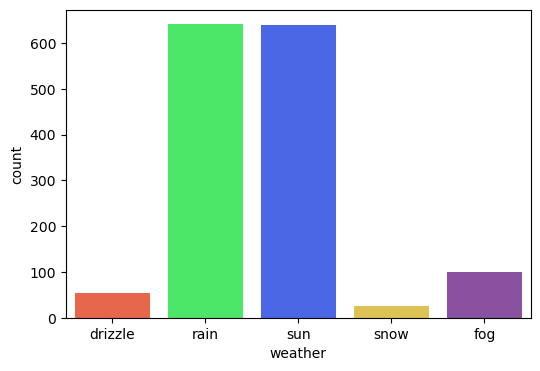

In [85]:
plt.figure(figsize=(6,4))
sns.countplot(data=df,x=df.weather, palette=['#FF5733', '#33FF57', '#3357FF', '#F4D03F', '#8E44AD'])
plt.show()

In [87]:
df.head()

,date,precipitation,temp_max,temp_min,wind,weather,year,month
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle,2012,1
1,2012-01-02,10.9,10.6,2.8,4.5,rain,2012,1
2,2012-01-03,0.8,11.7,7.2,2.3,rain,2012,1
3,2012-01-04,20.3,12.2,5.6,4.7,rain,2012,1
4,2012-01-05,1.3,8.9,2.8,6.1,rain,2012,1


In [89]:
df.drop('month',axis=1,inplace=True)
df.drop('year',axis=1,inplace=True)

In [93]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder


In [97]:
le = LabelEncoder()
df['weather']=le.fit_transform(df['weather'])

In [99]:
x = df[['temp_min', 'temp_max', 'precipitation', 'wind']]
y=df['weather']

In [101]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [103]:
model = GaussianNB()
model.fit(X_train, y_train)

GaussianNB()

In [111]:
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred, zero_division=1)


print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.83
